## Тема
Теория вероятностей: Парадокс дней рождения


## Описание
Даже в небольшой группе людей вероятность того, что хотя бы два человека имеют одинаковый день рождения, может быть удивительно высокой. Этот парадокс иллюстрирует интуитивную ошибку, часто встречающуюся при оценке вероятностей.


## Математический расчет
Пусть в группе из $n$ человек, вероятность того, что **никакие два человека не имеют одинаковый день рождения** вычисляется как:


$$
P_{unique} = \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \dots \times \frac{365 - n + 1}{365} = \prod_{i=0}^{n-1} \frac{365-i}{365}
$$


Тогда вероятность того, что **хотя бы два человека имеют одинаковый день рождения**:


$$
P_{duplicate} = 1 - P_{unique} = 1 - \prod_{i=0}^{n-1} \frac{365-i}{365}
$$


Для группы из 23 человек это даёт вероятность:


$$
P_{duplicate} = 1 - \prod_{i=0}^{22} \frac{365-i}{365} \approx 0.507
$$

In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def has_duplicate_birthdays(group_size):
    birthdays = [random.randint(1, 365) for _ in range(group_size)]
    return len(birthdays) != len(set(birthdays))

In [3]:
def simulate_birthday_paradox(group_size, simulations=10000):
    count = 0
    for _ in range(simulations):
        if has_duplicate_birthdays(group_size):
            count += 1
    return count / simulations

In [4]:
group_size = 23
simulations = 10000
sim_prob = simulate_birthday_paradox(group_size, simulations)
print(f"Эмпирическая вероятность совпадения дней рождения после {simulations} симуляций: {sim_prob:.4f}")

Эмпирическая вероятность совпадения дней рождения после 10000 симуляций: 0.5037


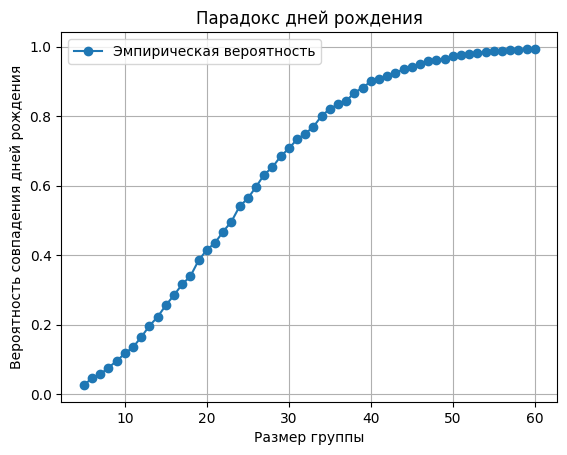

In [5]:
group_sizes = range(5, 61)
sim_probs = [simulate_birthday_paradox(size, simulations=5000) for size in group_sizes]


plt.plot(group_sizes, sim_probs, label='Эмпирическая вероятность', marker='o')
plt.xlabel("Размер группы")
plt.ylabel("Вероятность совпадения дней рождения")
plt.title("Парадокс дней рождения")
plt.legend()
plt.grid(True)
plt.show()